# Linear Algebra
Although its name may sound harmless, Linear Algebra is by no means a trivial branch of mathematics, and the deeper you dive into Data Science and Statistics, the more often you will encounter its concepts.  In this exercise, we'll start with some basic operations on matrices and vectors, then move onto Eigenvalues and Eigenvectors, and conclude with some Matrix Decompositions.

In [1]:
# Import modules
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import math

# Configure Jupyter notebook 
%matplotlib inline

## Eigenvalues and Eigenvectors
No discussion of Linear Algebra would be complete without taking a look at Eigenvalues and Eigenvectors.  The root word "eigen" comes from the German meaning "characteristic", and these values and associated vectors, represent some interesting properties of a given matrix.  Namely, for a given matrix $\textbf{A}$ and vector $\vec{v}$, the eigenvalue(s), $\lambda$, of $\textbf{A}$, are the $\lambda$ that satisfy the relationship $$\textbf{A} \vec{v} = \lambda \vec{v}$$ Keep in mind that $\lambda$ is a *scalar* quantity, and when you multiply a vector by a scalar quantity, you just scale, or stretch, the vector in space.  Therefore, the above relationship says that the eigenvalues $\lambda$ of $\textbf{A}$, and associated eigenvectors $\vec{v}$, are the vectors that when multiplied by $\textbf{A}$ just "stretch" in space (no rotations).

Now that may not sound very special, but the applicability of these concepts cannot be understated.  Eigenvalues and vectors have a tendency to crop up in any mathematically grounded discipline and Data Science is no exception.

For a more detailed explanation, see 
- [Great math formula explanation](http://www.visiondummy.com/2014/03/eigenvalues-eigenvectors/)
- [Visual explanation of Eigenvectors and Eigenvalues](http://setosa.io/ev/eigenvectors-and-eigenvalues/)

before proceding with the following exercises.

1. Generate a matrix $$\textbf{A} = \begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix}$$ and two vectors of your choosing, labeled $\vec{v}_1$ and $\vec{v}_2$.  Then compute the vectors $$\vec{v}_1' = \textbf{A}\vec{v}_1$$ $$\vec{v}_2' = \textbf{A}\vec{v}_2$$ And plot all 4 vectors with appropriate labels.  Comment on your results.
1. Now compute the eigenvalues and eigenvectors of $\textbf{A}$, then plot $\textbf{A}\vec{v}$ and $\lambda\vec{v}$ on seperate plots, where $\lambda$ is the eigenvalue of $\textbf{A}$.  Comment on your results.
1. How do the results of part (2) differ from part (1)?
1. Define a new 3x3 matrix of the form $$\textbf{A} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 4 & 2 & 5 \end{bmatrix}$$ and compute the eigenvalues and vectors.  What can you say about the number of eigenvectors in your results?
1. Define a new 3x3 matrix of the form $$\textbf{B} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 1 & 2 & -1 \end{bmatrix}$$ and compute the eigenvalues and vectors.  What can you say about the eigenvalues in your results?  Do they differ from what you saw in part (4)?
1. Compute the inverse of $\textbf{A}$ and $\textbf{B}$ above.  Comment on your results.
1. Compute the determinant of $\textbf{A}$ and $\textbf{B}$.  How might your results relate to the eigen values you computed above?
1. Consider the rotation matrix $$\textbf{R} = \begin{bmatrix} cos(\theta) & sin(\theta) \\ -sin(\theta) & cos(\theta)\end{bmatrix}$$.  Using a value of $\theta = 90$, compute the inner product of the columns, $\textbf{R}^T$, $\textbf{R}^{-1}$, $det(\textbf{R})$, and the eigenvalues and eigenvectors.  Comment on your results.

### Question 1
A. Generate a matrix $$\textbf{A} = \begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix}$$ and two vectors of your choosing, labeled $\vec{v}_1$ and $\vec{v}_2$.

In [2]:
# Generate a matrix A and vectors v1 and v2
A = np.matrix([[0, 1], [-2, -3]])
v1 = np.matrix([[2], [3]])
v2 = np.matrix([[-1], [4]])

B. Compute the vectors $$\vec{v}_1' = \textbf{A}\vec{v}_1$$ $$\vec{v}_2' = \textbf{A}\vec{v}_2$$

In [3]:
# Compute the vectors v1' = Av1 and v2' = Av2
v1_prime = A * v1
v2_prime = A * v2

C. Plot all 4 vectors with appropriate labels.

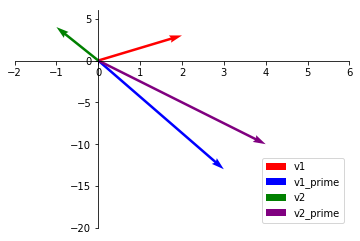

In [4]:
# Create data structure for plotting
vectors = [np.insert(x, 0, [0, 0]) for x in [v1.getA1(), v1_prime.getA1(), v2.getA1(), v2_prime.getA1()]]
labels = ['v1', 'v1_prime', 'v2', 'v2_prime']
colors = ['red', 'blue', 'green', 'purple']

# Plot using quiver
plt.figure()
ax = plt.gca()

for i in range(len(vectors)):
    X, Y, U, V = vectors[i]
    Q = ax.quiver(X, Y, U, V, angles = 'xy', scale_units = 'xy', scale = 1, color = colors[i], label = labels[i])
ax.legend(labels, loc = 'lower right')
ax.set_xlim([-2, 6])
ax.set_ylim([-20, 6])

# Adjust splines
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(['data', 0])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(['data', 0])

# Show plot
plt.show()

D. Comment on your results.
* Multiplication by the matrix $A$ rotated vectors $v1$ and $v2$.

### Question 2

A. Compute the eigenvalues and eigenvectors of matrix $A$.

In [5]:
# Compute the eigenvalues and eigenvectors of A
lambdas, evecs = LA.eig(A)

# Print results
print("Eigenvalues:")
print(lambdas)
print("\nEigenvectors:")
print(evecs)

Eigenvalues:
[-1. -2.]

Eigenvectors:
[[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


B. Plot $\textbf{A}\vec{v}$

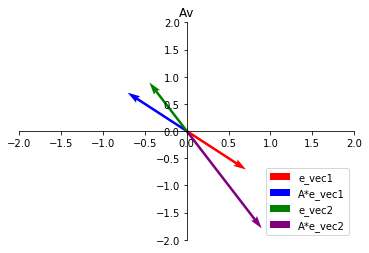

In [6]:
# Create data structure for plotting
vectors = [np.insert(x, 0, [0, 0]) for x in [evecs.transpose()[0].getA1(), (A*evecs).transpose()[0].getA1(),
                                             evecs.transpose()[1].getA1(), (A*evecs).transpose()[1].getA1()]]
labels = ['e_vec1', 'A*e_vec1', 'e_vec2', 'A*e_vec2']
colors = ['red', 'blue', 'green', 'purple']

# Plot using quiver
plt.figure()
plt.title('Av')
ax = plt.gca()

for i in range(len(vectors)):
    X, Y, U, V = vectors[i]
    Q = ax.quiver(X, Y, U, V, angles = 'xy', scale_units = 'xy', scale = 1, color = colors[i], label = labels[i])
ax.legend(labels, loc = 'lower right')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

# Adjust splines
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(['data', 0])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(['data', 0])

# Show plot
plt.show()

C. Plot $\lambda\vec{v}$

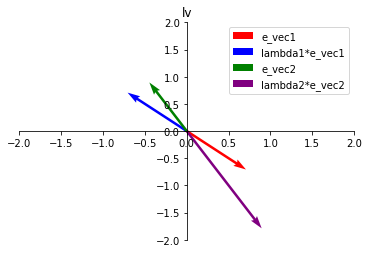

In [7]:
# Create data structure for plotting
vectors = [np.insert(x, 0, [0, 0]) for x in [evecs.transpose()[0].getA1(), (lambdas[0]*evecs).transpose()[0].getA1(),
                                             evecs.transpose()[1].getA1(), (lambdas[1]*evecs).transpose()[1].getA1()]]
labels = ['e_vec1', 'lambda1*e_vec1', 'e_vec2', 'lambda2*e_vec2']
colors = ['red', 'blue', 'green', 'purple']

# Plot using quiver
plt.figure()
plt.title('lv')
ax = plt.gca()

for i in range(len(vectors)):
    X, Y, U, V = vectors[i]
    Q = ax.quiver(X, Y, U, V, angles = 'xy', scale_units = 'xy', scale = 1, color = colors[i], label = labels[i])
ax.legend(labels, loc = 'upper right')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

# Adjust splines
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(['data', 0])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(['data', 0])

# Show plot
plt.show()

D. Comment on your results.
* Multiplying the eigenvectors times the matrix is equivalent to multiplying the eigenvectors to the eigenvalues.

### Question 3

#### How do the results of part (2) differ from part (1)?
* Part (1) transformed the matrix, rotating the result in space. However, the eigenvectors and eigenvalues did not rotate the matrix but only scaled the result in space along the same vectors.

### Question 4

Define a new 3x3 matrix of the form $$\textbf{A} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 4 & 2 & 5 \end{bmatrix}$$ and compute the eigenvalues and vectors.

In [8]:
# Define new 3x3 matrix A
A = np.matrix([[-2, -4, 2], [-2, 1, 2], [4, 2, 5]])

# Compute eigenvectors and eigenvalues
evals_A, evecs_A = LA.eig(A)

# Print results
print("Eigenvalues:")
print(evals_A)
print("\nEigenvectors:")
print(evecs_A)

Eigenvalues:
[-5.  3.  6.]

Eigenvectors:
[[ 0.81649658  0.53452248  0.05842062]
 [ 0.40824829 -0.80178373  0.35052374]
 [-0.40824829 -0.26726124  0.93472998]]


#### What can you say about the number of eigenvectors in your results?
* The matrix has the same number of eigenvectors as its dimension.

### Question 5

Define a new 3x3 matrix of the form $$\textbf{B} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 1 & 2 & -1 \end{bmatrix}$$ and compute the eigenvalues and vectors.

In [9]:
# Define new 3x3 matrix A
B = np.matrix([[-2, -4, 2], [-2, 1, 2], [1, 2, -1]])

# Compute eigenvectors and eigenvalues
evals_B, evecs_B = LA.eig(B)

# Print results
print("Eigenvalues:")
print(evals_B)
print("\nEigenvectors:")
print(evecs_B)

Eigenvalues:
[ -5.00000000e+00   1.45716772e-16   3.00000000e+00]

Eigenvectors:
[[  8.16496581e-01   7.07106781e-01  -5.34522484e-01]
 [  4.08248290e-01  -1.18308270e-16   8.01783726e-01]
 [ -4.08248290e-01   7.07106781e-01   2.67261242e-01]]


#### What can you say about the number of eigenvectors in your results? Do they differ from part (4)?
* One eigenvector of this matrix is 0, within floating point error. This was not the case in part (4).

### Question 6

Compute the inverse of $\textbf{A}$ and $\textbf{B}$ above.

In [10]:
# Compute the inverse of A
try:
    A_inv = LA.inv(A)
    print(A_inv)
except:
    print("Singular matrix.")

[[-0.01111111 -0.26666667  0.11111111]
 [-0.2         0.2        -0.        ]
 [ 0.08888889  0.13333333  0.11111111]]


In [11]:
# Compute the inverse of B
try:
    B_inv = LA.inv(B)
    print(B_inv)
except:
    print("Singular matrix.")

Singular matrix.


#### Comment on your results.
* The matrix that had the same number of non-zero eigenvectors as dimensions is invertible, but not the matrix with one eigenvector equal to zero.

### Question 7

Compute the determinant of $\textbf{A}$ and $\textbf{B}$.

In [12]:
# Compute the determinant of A
LA.det(A)

-90.0

In [13]:
# Compute the determinant of B
LA.det(B)

0.0

#### How might your results relate to the eigenvalues you computed above?
* If there are fewer non-zero eigenvalues than dimensions of the matrix, the determinant of the matrix is also zero. (Defining a non-invertible or singular matrix.)

### Question 8

Consider the rotation matrix $$\textbf{R} = \begin{bmatrix} cos(\theta) & sin(\theta) \\ -sin(\theta) & cos(\theta)\end{bmatrix}$$.  Using a value of $\theta = 90$, compute the inner product of the columns, $\textbf{R}^T$, $\textbf{R}^{-1}$, $det(\textbf{R})$, and the eigenvalues and eigenvectors.  Comment on your results.

In [14]:
# Create rotation matrix with theta = 90 degrees
t = np.deg2rad(90)
R = np.matrix([[math.cos(t), math.sin(t)], [-math.sin(t), math.cos(t)]])
R

matrix([[  6.12323400e-17,   1.00000000e+00],
        [ -1.00000000e+00,   6.12323400e-17]])

In [15]:
# Compute inner product of the columns
np.dot(np.array([np.cos(t), np.sin(t)]), np.array([-np.sin(t), np.cos(t)]))

0.0

In [16]:
# Compute the transpose of R
R.T

matrix([[  6.12323400e-17,  -1.00000000e+00],
        [  1.00000000e+00,   6.12323400e-17]])

In [17]:
# Compute the inverse of R
LA.inv(R)

matrix([[  6.12323400e-17,  -1.00000000e+00],
        [  1.00000000e+00,   6.12323400e-17]])

In [18]:
# Compute the determinant of R
LA.det(R)

1.0

In [19]:
# Compute the eigenvectors and eigenvalues of R
lambdas, v_s = LA.eig(R)

# Print results
print("Eigenvalues:")
print(lambdas)
print("\nEigenvectors:")
print(v_s)

Eigenvalues:
[  6.12323400e-17+1.j   6.12323400e-17-1.j]

Eigenvectors:
[[ 0.70710678+0.j          0.70710678-0.j        ]
 [ 0.00000000+0.70710678j  0.00000000-0.70710678j]]


#### Comment on your results.
* Since the dot product of the columns is 0, this matrix is defined as orthogonal. Other ways of seeing the orthogonality of the matrix is the fact that the transpose is equal to the inverse, the determinant is equal to 1 (the same would also be true of -1), and the eigenvectors/eigenvalues are complex conjugates of one another.